In [1]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle
import json
from Utils.evaluation import EvaluationMetrics, ActualStats
from Utils.helper import *
from Utils.sample_squads import *

## Innings 1

In [2]:
model_inn1 = tf.keras.models.load_model('Models\Inn1-HeavyDense-ep20to50\cp-0029.h5')
model_inn2 = tf.keras.models.load_model('Models\Inn2-HeavyDenseRequired-ep30to50\cp-0016.h5')

In [90]:
evaluator = EvaluationMetrics(model_inn1, model_inn2,
                              # )
                              "Evaluation/tournament2.pkl")

In [42]:
# evaluator.save_object("Evaluation/tournament2.pkl")

In [76]:
# evaluator.display_table()
# verbose = 0
# evaluator.reinitialize_tournament()
# for _ in tqdm(range(56), ncols=80, disable=True if verbose!=0 else False):
#     if verbose != 0:
#         print(f"\n\nMatch number: {evaluator.match_count+1}")
#     evaluator.simulate_match(verbose)

# # evaluator.display_table()
# evaluator.save_object("Evaluation/tournament1.pkl")

,Played,Wins,Losses,Points,NRR
Kolkata Knight Riders,14,10,4,20,0.810151
Sunrisers Hyderabad,14,9,5,18,0.499538
Rajasthan Royals,14,8,5,17,0.542185
Delhi Capitals,14,7,7,14,-0.332226
Kings XI Punjab,14,6,7,13,-0.283227
Royal Challengers Bangalore,14,6,8,12,0.051516
Mumbai Indians,14,6,8,12,-0.588663
Chennai Super Kings,14,3,11,6,-0.668594


100%|███████████████████████████████████████████| 56/56 [41:41<00:00, 44.67s/it]


In [91]:
actualstat = ActualStats("Evaluation/actual.pkl")
# actualstat = ActualStats()
# actualstat.run_df(1, True)
# actualstat.run_df(2, True)

## First Innings Target Evaluation

In [92]:
from scipy import stats
# stats.ttest_ind(evaluator.total_stat[::2], actualstat.total_stat, equal_var=False)
stats.ks_2samp(evaluator.total_stat, actualstat.total_stat)


KstestResult(statistic=0.07719604516086928, pvalue=0.029787544942655522)

In [93]:
len(evaluator.total_stat), len(actualstat.total_stat)

(616, 796)

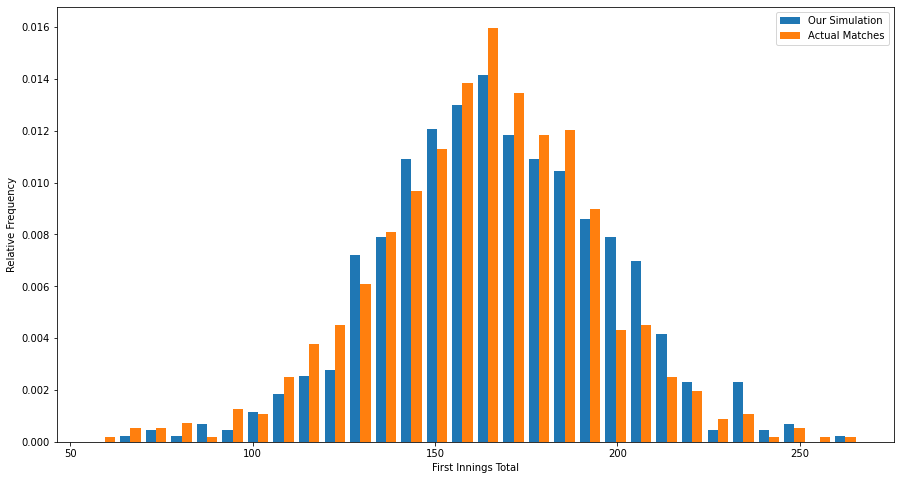

In [95]:
import matplotlib.pyplot as plt
plt.hist([evaluator.total_stat, actualstat.total_stat], density=True, bins=30, label=["Our Simulation", "Actual Matches"])
plt.legend()
plt.xlabel("First Innings Total")
plt.ylabel("Relative Frequency")
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

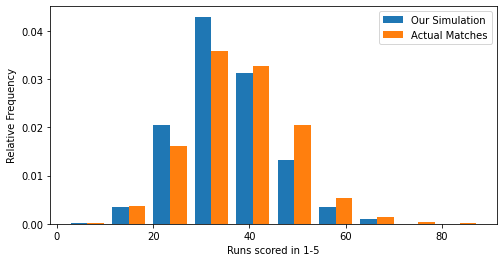

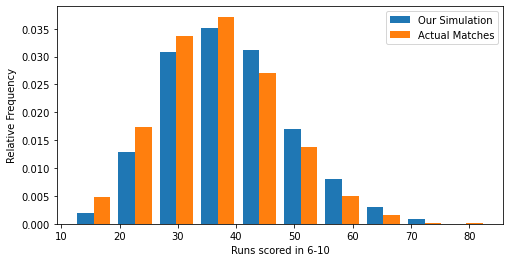

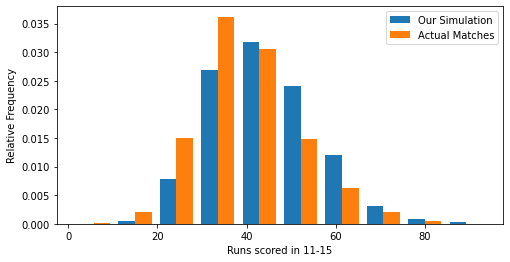

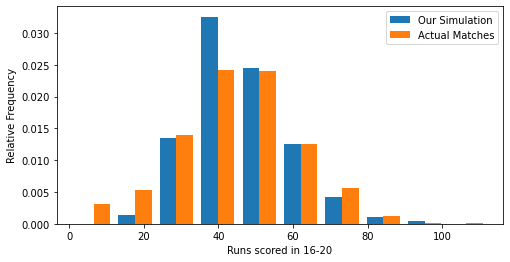

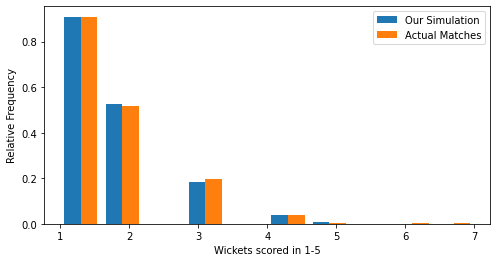

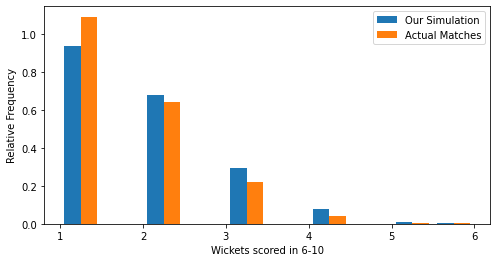

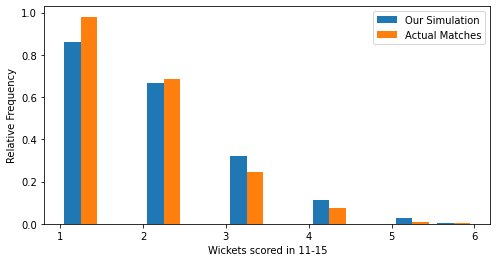

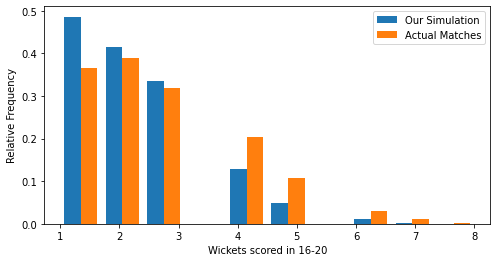

In [154]:
import matplotlib.pyplot as plt
for key in ["runs", "wickets"]:
    for i in range(4):
        plt.hist([[k for k in evaluator.progression_stat[key][i] if k!=0], [k for k in actualstat.progression_stat[key][i] if k!=0]],
                 density=True, bins=10, label=["Our Simulation", "Actual Matches"])
        plt.legend()
        plt.xlabel(f"{key.title()} scored in {i*5+1}-{i*5+5}")
        plt.ylabel("Relative Frequency")
        fig = plt.gcf()
        fig.set_size_inches(8, 4)
        plt.show()

In [156]:
actual_batsmen_df = pd.read_csv("Evaluation/Actual_Batsmen.csv")
evaluate_batsmen_df = pd.read_csv("Evaluation/Evaluate_Batsmen.csv")
actual_bowler_df = pd.read_csv("Evaluation/Actual_Bowler.csv")
evaluate_bowler_df = pd.read_csv("Evaluation/Evaluate_Bowler.csv")

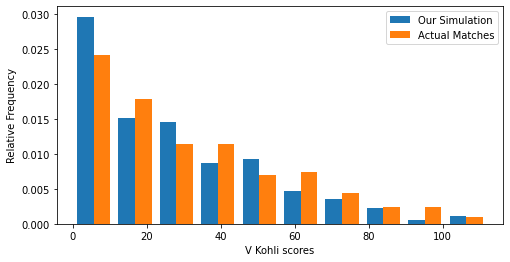

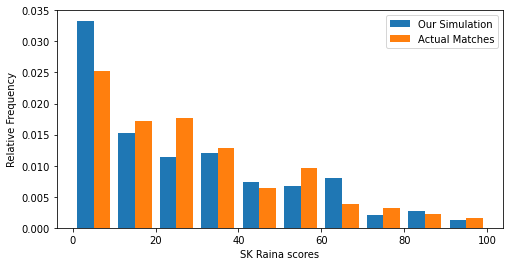

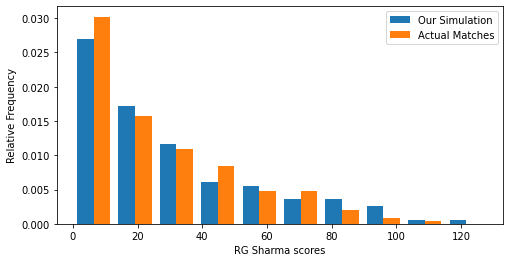

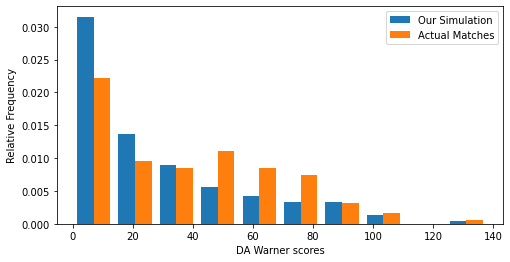

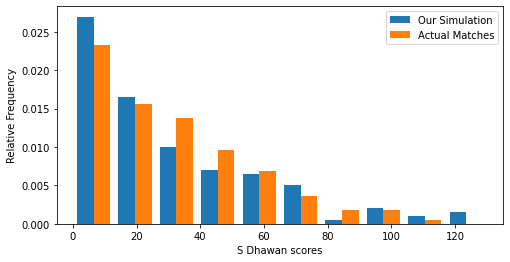

In [157]:
for player in list(actual_batsmen_df["Unnamed: 0"])[:5]: 
    if player not in evaluator.batsmen_stat:
        continue
    player_actual = [i["Runs"] for i in actualstat.batsmen_stat[player]]
    player_evaluator = [i["Runs"] for i in evaluator.batsmen_stat[player]]
    plt.hist([player_evaluator, player_actual], 
            density=True, bins=10,
            label=["Our Simulation", "Actual Matches"])
    plt.legend()
    plt.xlabel(f"{player} scores")
    plt.ylabel("Relative Frequency")
    fig = plt.gcf()
    fig.set_size_inches(8, 4)
    plt.show()

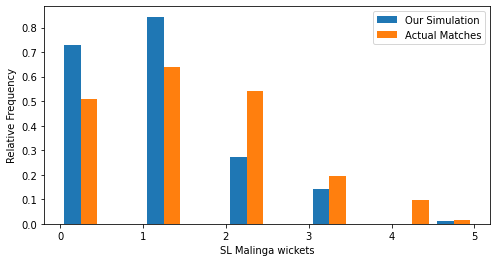

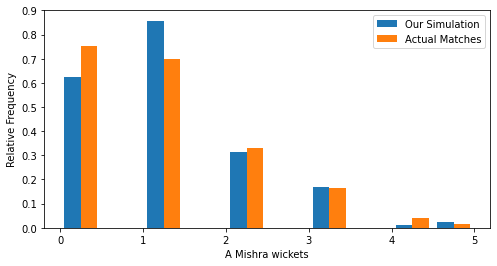

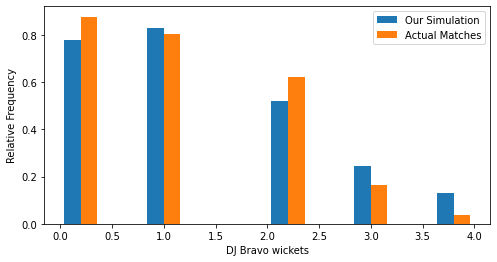

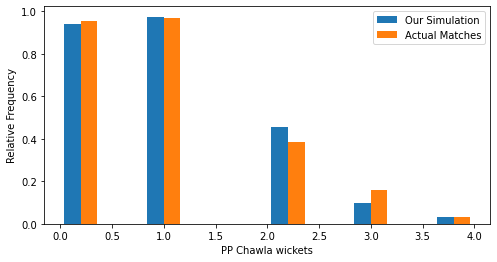

In [161]:
for player in list(actual_bowler_df["Unnamed: 0"])[:5]: 
    if player not in evaluator.bowler_stat:
        continue
    player_actual = [i["Wickets Taken"] for i in actualstat.bowler_stat[player]]
    player_evaluator = [i["Wickets Taken"] for i in evaluator.bowler_stat[player]]
    plt.hist([player_evaluator, player_actual], 
            density=True, bins=10,
            label=["Our Simulation", "Actual Matches"])
    plt.legend()
    plt.xlabel(f"{player} wickets")
    plt.ylabel("Relative Frequency")
    fig = plt.gcf()
    fig.set_size_inches(8, 4)
    plt.show()

In [138]:
import statistics
import math
mean_sim = statistics.mean(evaluator.total_stat)
variance_sim = statistics.variance(evaluator.total_stat)
mean_actual = statistics.mean(actualstat.total_stat)
variance_actual = statistics.variance(actualstat.total_stat)
z = abs(mean_actual - mean_sim)/(math.sqrt(variance_actual+variance_sim))
print(z)

0.09609911041661909


In [97]:
mean_actual, mean_sim,variance_actual, variance_sim

(162.44095477386935, 166.57954545454547, 917.474496697323, 937.1936622320769)

## Batsmen Statistics

In [108]:
batsmen_result_dic = {}
bat_stat = evaluator.batsmen_stat
for batsman in bat_stat:
    tot_runs = 0
    tot_balls = 0
    num_4 = 0
    num_6 = 0
    num_inn = 0
    num_out = 0
    hs = [0, ""]
    dismissal_type = []
    dismissed_by = []
    for i in bat_stat[batsman]:
        num_inn += 1
        tot_runs += i["Runs"]
        if i["Runs"] > hs[0] or (i["Runs"] == hs[0] and hs[1] == ""):
            hs[0] = i["Runs"]
            if i["Dismissal Type"] != "Not Out":
                hs[1] = "*"
        tot_balls += i["Balls Faced"]
        num_4 += i["Fours"]
        num_6 += i["Sixes"]
        if i["Dismissal Type"] != "Not Out":
            num_out += 1
        dismissal_type.append(i["Dismissal Type"])
        dismissed_by.append(i["Dismissed By"])
    batsmen_result_dic[batsman] = {
        "Innings": num_inn,
        "Runs": tot_runs,
        "Balls": tot_balls,
        "Fours": num_4,
        "Sixes": num_6,
        "High Score": "".join([str(i) for i in hs]),
        "Average": tot_runs/num_out if num_out!=0 else tot_runs,
        "Strike Rate": tot_runs/tot_balls*100 if tot_balls!=0 else 0,
        "Boundry Percent": (6*num_6+4*num_4)/tot_runs*100 if tot_runs!=0 else 0,
        }

In [109]:
batsmen_stat_df = pd.DataFrame.from_dict(batsmen_result_dic, orient='index')
save_df = batsmen_stat_df.sort_values(by=["Runs", "Balls"], ascending=False)
save_df.to_csv("Evaluation/Evaluate_Batsmen.csv")
save_df.head(20)

,Innings,Runs,Balls,Fours,Sixes,High Score,Average,Strike Rate,Boundry Percent
AM Rahane,154,4957,3852,497,173,121*,33.493243,128.686397,61.044987
P Shaw,154,4953,3894,530,162,127*,35.127660,127.195686,62.426812
JC Buttler,154,4847,3629,544,166,149*,33.895105,133.562965,65.442542
CH Gayle,154,4836,3609,542,161,125*,34.056338,133.998337,64.805624
Q de Kock,154,4817,3659,503,186,131*,34.163121,131.647991,64.936683
SR Watson,154,4760,3571,517,171,138*,33.521127,133.295996,65.000000
S Dhawan,154,4728,3629,503,166,130*,33.062937,130.283825,63.620981
PA Patel,154,4724,3483,537,151,148*,33.034965,135.630204,64.648603
CA Lynn,154,4687,3502,471,183,145*,33.007042,133.837807,63.622786
F du Plessis,154,4617,3447,438,172,134*,33.700730,133.942559,60.298895


In [110]:
bowler_result_dic = {}
bowler_stat = evaluator.bowler_stat
for bowler in bowler_stat:
    tot_runs = 0
    tot_balls = 0
    tot_wickets = 0
    for i in bowler_stat[bowler]:
        tot_runs += i["Runs Conceded"]
        tot_balls += i["Balls"]
        tot_wickets += i["Wickets Taken"]
    bowler_result_dic[bowler] = {
        "Runs Conceded": tot_runs,
        "Overs": f"{tot_balls//6}.{tot_balls%6}",
        "Wickets": tot_wickets,
        "Economy": tot_runs/tot_balls*6 if tot_balls != 0 else 0,
        }


In [111]:
bowler_stat_df = pd.DataFrame.from_dict(bowler_result_dic, orient='index')
save_df = bowler_stat_df.sort_values(by=["Wickets", "Economy"], ascending=[False, True])
save_df.to_csv("Evaluation/Evaluate_Bowler.csv")
save_df.head(20)

,Runs Conceded,Overs,Wickets,Economy
DJ Bravo,4828,562.3,192,8.583111
JJ Bumrah,4693,588.1,181,7.979031
RD Chahar,5284,613.3,179,8.612877
C de Grandhomme,5025,603.0,178,8.333333
YS Chahal,5081,611.0,174,8.315876
S Gopal,5230,612.3,174,8.538776
UT Yadav,4471,563.1,170,7.939035
A Mishra,4818,608.1,167,7.922170
J Archer,4858,551.1,167,8.814031
N Saini,4983,608.0,166,8.195724
